<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
data.sample(n=10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4860,18,19.25,331.35,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3306,16,20.50,290.55,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3626,71,113.65,8166.80,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
2803,26,80.70,2193.00,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0
2414,13,100.80,1308.10,Female,1,No,No,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4930,14,50.45,765.45,Female,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,0
1890,32,85.65,2664.30,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
924,39,50.65,1905.40,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0
2675,66,110.60,7210.85,Female,1,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),0
3861,71,104.10,7412.25,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0


Теперь проверим наши данные на наличие незаполненных значений

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Как мы видим, ни в одной колонке незаполненных полей нет.

Теперь посмотрим на типы данных в колонках

In [ ]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

'TotalSpent' - это числовой признак, имеющий тип данных object.

In [ ]:
corrupted = data.loc[data['TotalSpent'] == ' ']
corrupted

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Нашлись строки с абонентами, у которых данное поле заполнено знаком ' '.
Судя по полю 'ClientPeriod', пробел в 'TotalSpent' имеют только что подключившиеся люди, которые не успели внести абонентскую плату. Значит, их 'TotalSpent' должен быть равен нулю.

In [ ]:
data.loc[data['TotalSpent'] == ' '] = 0

Теперь можно конвертировать данный столбец в тип float

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Также нужно изменить тип данных категориальных колонок с object на categorial

In [ ]:
for cat in cat_cols:
    data[cat] = pd.Categorical(data[cat])

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построим boxplots для численных признаков

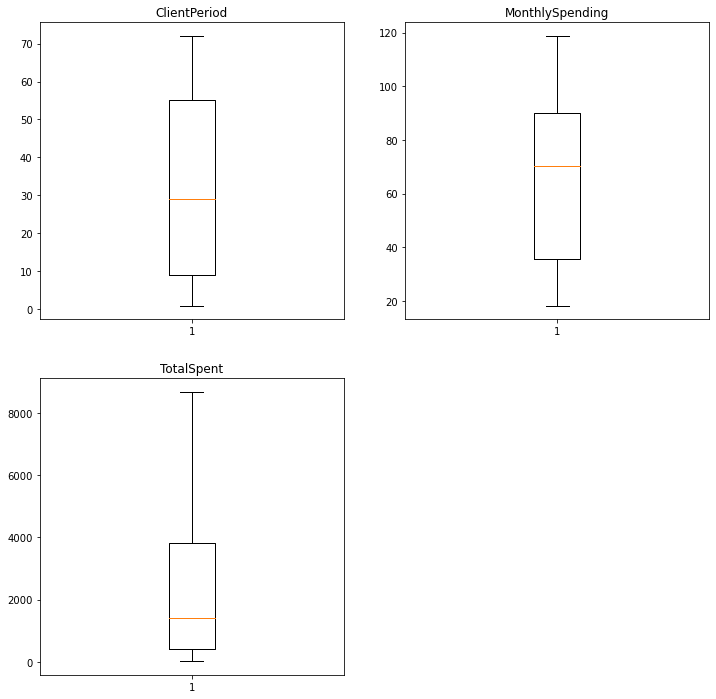

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))

# ax = ax.ravel()

for i, num in enumerate(num_cols):
    
    ax = fig.add_subplot(221 + i)
    ax.set_title(num)
    ax.boxplot(data[num])

plt.show()

Как мы видим из графиков, значительные выбросы в данных не обнаружены (для boxplot выбросы выглядят как точки выше или ниже "усов", у нас таких нет).

перейдем к построение piecharts для категориальных признаков

Теперь можно перейти к построению графиков:

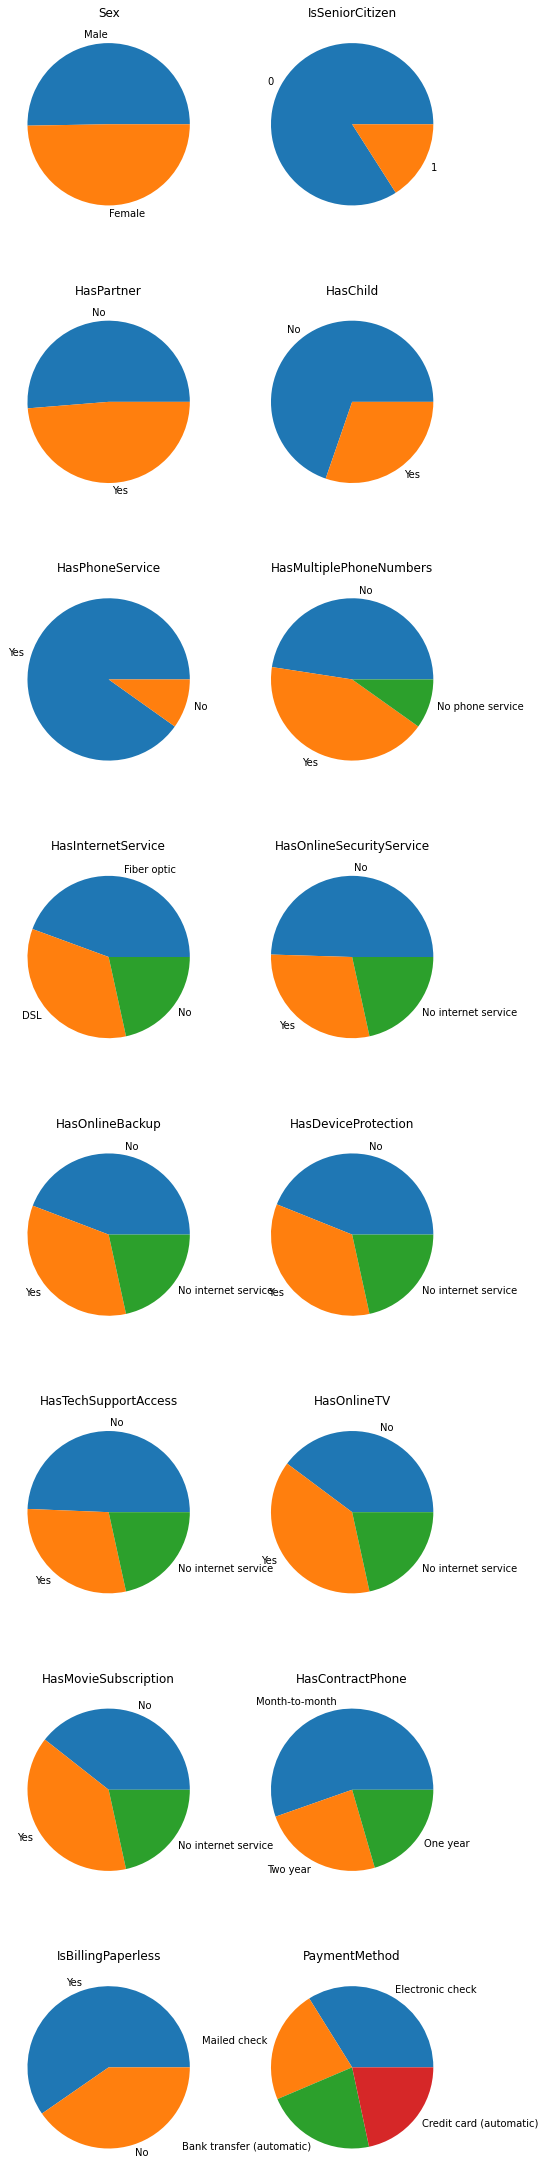

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(8,40))
ax = ax.ravel()

for i, cat in enumerate(cat_cols):
    
    ax[i].set_title(cat)
    ax[i].pie(data[cat].value_counts(),
              labels=data[cat].value_counts().index)

plt.show()

И наконец посмотрим на распределение нашей целевой переменной

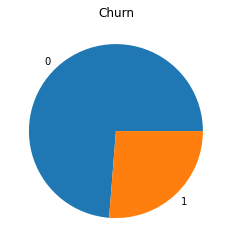

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(target_col)
ax.pie(data[target_col].value_counts(), labels=data[target_col].value_counts().index)

plt.show()

Баланс переменных в пределах нормы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
numeric_data = data[num_cols]
numeric_data.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45


Для начала закодируем категориальные признаки при помощи one-hot-encoding'а.

In [ ]:
categorial_data = data[cat_cols]
dummy_features = pd.get_dummies(categorial_data)
dummy_features.head()

,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0,1,1,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


Объединим числовые данные с измененными категориальными признаками.

In [ ]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


Целевая переменная:

In [ ]:
y = data[target_col]

Отнормируем данные:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = LogisticRegressionCV(cv=5, random_state=0, refit=True, scoring='roc_auc')
# LogisticRegressionCV сам найдет лучшие параметры и обучит модель с ними
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.678125

In [ ]:
clf.C_

array([21.5443469])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Как мы видим, лучшее найденное значение С = 21.5443469 с качеством 0.678125

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

Попробуем использовать градиентный бустинг с дефолтными параметрами

In [ ]:
from catboost import CatBoost

cls = CatBoost()

X = pd.concat([numeric_data, categorial_data], axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

cls.fit(X_train, y_train, cat_features=cat_cols)
y_pred = cls.predict(X_test)

In [ ]:
roc_auc_score(y_test, y_pred)

0.8322458126916725

In [ ]:
from catboost import CatBoostClassifier

cls = CatBoostClassifier(eval_metric='AUC', cat_features=cat_cols)

X = pd.concat([numeric_data, categorial_data], axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

cls.fit(X_train, y_train, cat_features=cat_cols)
y_pred = cls.predict(X_test)

In [ ]:
roc_auc_score(y_test, y_pred)

0.68515625

Попробуем потестировать разные значения параметров:

In [ ]:
cls = CatBoostClassifier(eval_metric='AUC', cat_features=cat_cols)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = cls.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

In [ ]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [ ]:
cls = CatBoostClassifier(eval_metric='AUC', cat_features=cat_cols, l2_leaf_reg = 1)

grid = {'learning_rate': [0.03, 0.05, 0.08, 0.1, 0.12],
        'depth': range(1, 11)}

grid_search_result = cls.grid_search(grid, 
                                     X=X, 
                                     y=y, 
                                     plot=True,
                                     cv=5,
                                     refit=True,
                                     verbose=False)

In [ ]:
best_model = clf

In [ ]:
cls = CatBoostClassifier(eval_metric='AUC', cat_features=cat_cols, l2_leaf_reg = 1)

grid = {'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.08, 0.1],
        'depth': range(1, 11),
        'num_trees': [300, 500, 800, 1000, 1200, 1500, 2000]}

grid_search_result = cls.grid_search(grid, 
                                     X=X, 
                                     y=y, 
                                     plot=True,
                                     cv=5,
                                     refit=True,
                                     verbose=False)

In [ ]:
cls = CatBoostClassifier(eval_metric='AUC', cat_features=cat_cols)

grid = {'learning_rate': [0.03, 0.05, 0.08, 0.1],
        'depth': [3, 5, 7],
        'num_trees': [1000, 1500, 2000]}

grid_search_result = cls.grid_search(grid, 
                                     X=X, 
                                     y=y, 
                                     plot=True,
                                     cv=5,
                                     refit=True,
                                     verbose=False)

In [ ]:
grid_search_result['params']

{'depth': 3, 'iterations': 1000, 'learning_rate': 0.05}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.8664
С глубиной деревьев, равной 3, learning_rate'ом 0.05 и количеством деревьев 1000

# Предсказания

In [ ]:
best_model = cls

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = 1 - best_model.predict_proba(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

Итоговый score на Каггле: 0.85131
(мой никнейм: Andrey_Vagin)